<a href="https://colab.research.google.com/github/jayeshbhandarkar/Text-to-Image-Generator-using-Stable-Diffusion-Model/blob/main/MultilingualTextToImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install googletrans==3.1.0a0
%pip install --upgrade diffusers transformers -q

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 1.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16416 sha256=1255bb26528c3934c0f4bcee8c13181b3f27aafeb8cc38a5e5fa845589a99724
  Stored in directory: c:\users\ritik\appdata\local\pip\cache\wheels\96\ac\bd\9df9eab356c0576896e97147425987f6f45e9e46456c978d18
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installa

In [2]:
from googletrans import Translator
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

C:\Users\ritik\AppData\Roaming\Python\Python312\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [3]:

def get_translation(text,dest_lang):
  translator = Translator()
  translated_text = translator.translate(text, dest=dest_lang)
  return translated_text.text


In [ ]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (900,900)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt3"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [ ]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

C:\Users\ritik\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ritik\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\ritik\AppData\Roaming\Python\Python312\site-packages\diffusers\pipelines\pipeline_loa

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image


In [8]:
translation = get_translation("ప్రజలు హోలీ జరుపుకుంటున్నారు","en")
generate_image(translation, image_gen_model)

NameError: name 'get_translation' is not defined

  0%|          | 0/35 [00:00<?, ?it/s]

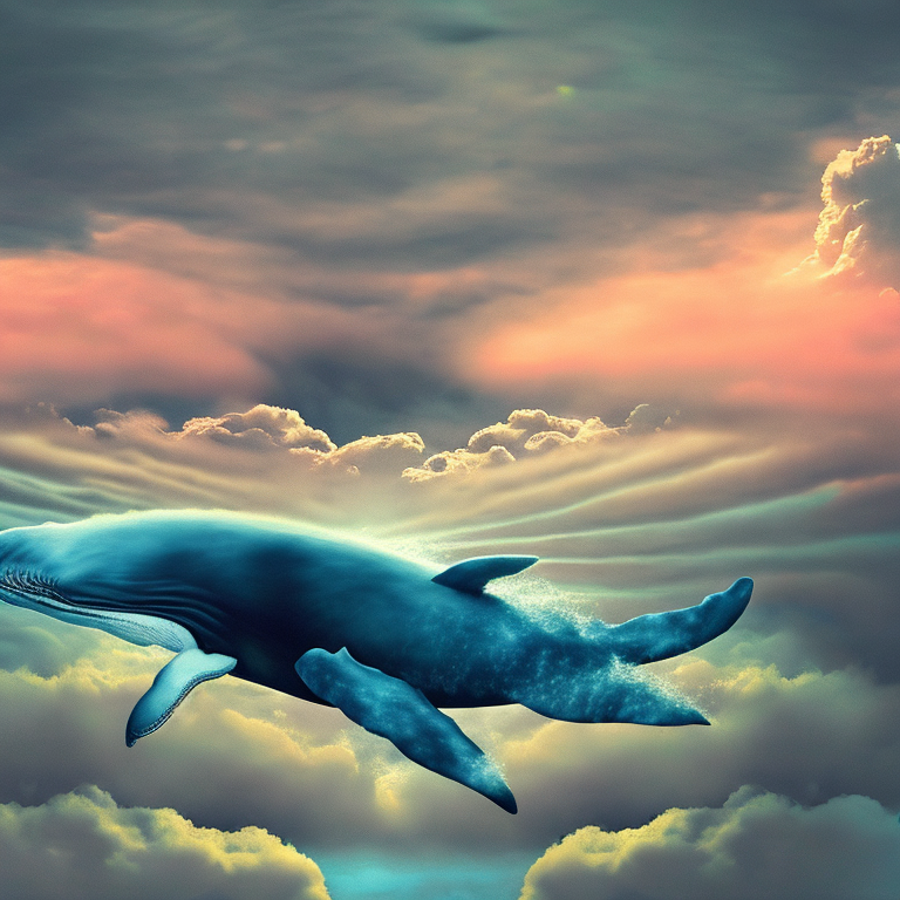

In [18]:
translation = get_translation("चैतन्यमय, स्वप्नासारख्या आकाशात ढगांमधून पोहणाऱ्या महाकाय व्हेलचे अवास्तव दृश्य","en")
generate_image(translation, image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

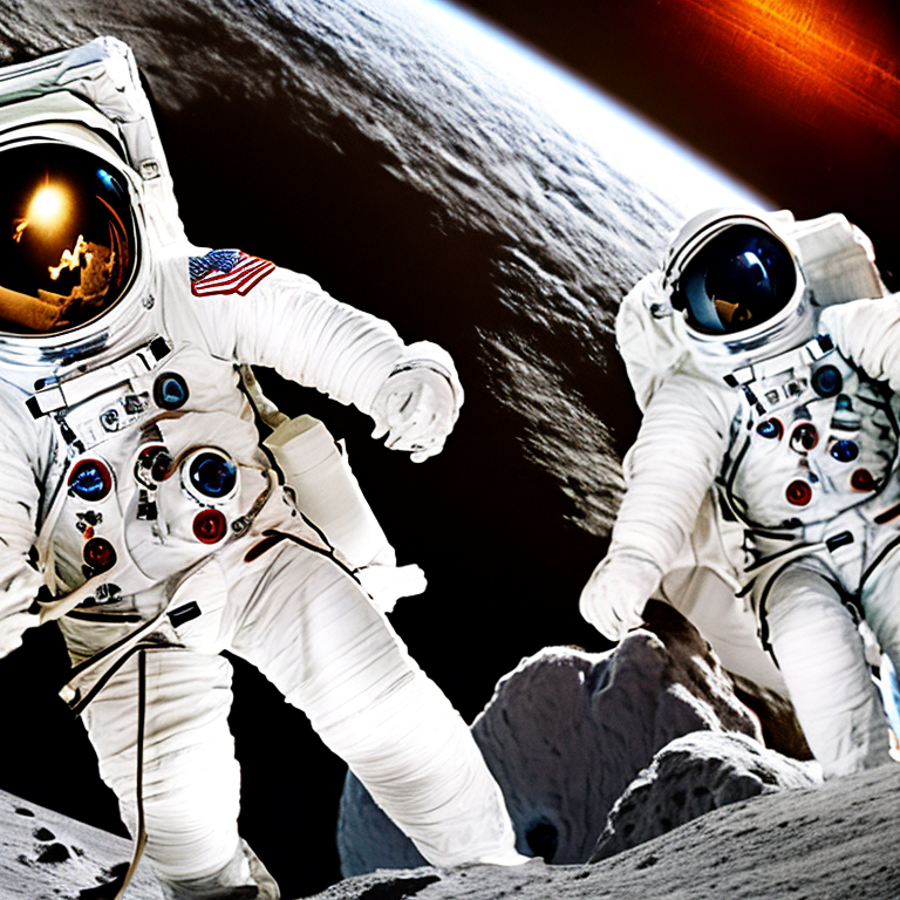

In [13]:
translation = get_translation("விண்வெளியில் விண்வெளி வீரர்கள்","en")
generate_image(translation, image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

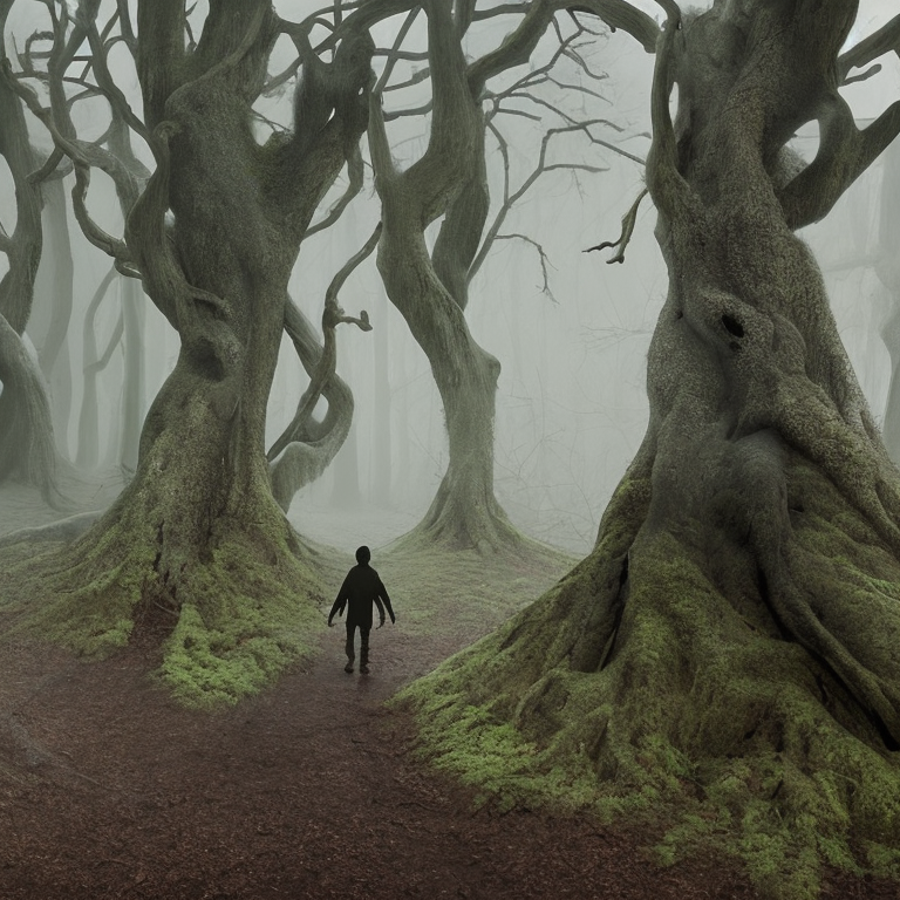

In [21]:
translation = get_translation("Eine eindringliche und atmosphärische Szene einer geisterhaften Gestalt, die durch einen nebligen, uralten Wald voller verdrehter, knorriger Bäume wandert","en")
generate_image(translation, image_gen_model)